# 🏏 IPL 2025 Batting Performance Analysis

## 📌 Project Objective

The objective of this project is to analyze IPL 2025 batting performance using data cleaning, preprocessing, feature engineering, and exploratory data analysis (EDA).

This project focuses on:
- Identifying top performers
- Comparing strike rate and consistency
- Analyzing boundary dependency
- Understanding team-level batting trends


## 📂 Importing Required Libraries

We begin by importing essential Python libraries for data manipulation and visualization.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📊 Loading the Dataset

The dataset contains batting statistics of IPL 2025 players including:
- Runs
- Matches
- Strike Rate
- Average
- Boundaries (4s & 6s)
- Balls Faced


In [2]:
df = pd.read_csv("IPL2025Batters.csv")

## 🔍 Initial Data Exploration

We inspect the dataset to understand:
- Number of rows and columns
- Data types
- Missing values
- Structure of the dataset


In [3]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38
2,Virat Kohli,RCB,657,15,15,3,73*,54.75,454,144.71,0,8,66,19
3,Shubman Gill,GT,650,15,15,2,93*,50.00,417,155.87,0,6,62,24
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB


In [5]:
df.columns

Index(['Player Name', 'Team', 'Runs', 'Matches', 'Inn', 'No', 'HS', 'AVG',
       'BF', 'SR', '100s', '50s', '4s', '6s'],
      dtype='object')

## 🧹 Data Cleaning

In this phase, we:
- Remove duplicate records
- Convert AVG column to numeric format
- Clean the Highest Score (HS) column by removing '*' and creating a separate indicator for not-out innings


In [6]:
df = df.drop_duplicates()

In [7]:
df["AVG"] = pd.to_numeric(df["AVG"], errors='coerce')

In [8]:
df["AVG"].dtype

dtype('float64')

### Cleaning Highest Score (HS)

The HS column contains values like '108*' where '*' indicates a not-out innings.

We:
- Create a new column `HS_Not_Out`
- Remove '*' from HS
- Convert HS to integer format


In [9]:
df["HS"]

0      108*
1       73*
2       73*
3       93*
4       117
       ... 
151      1*
152      1*
153       1
154       1
155       1
Name: HS, Length: 156, dtype: object

In [10]:
df['HS_Not_Out'] = df['HS'].str.contains('*', regex=False)

In [11]:
df['HS'] = df['HS'].str.replace('*', '', regex=False).astype(int)

In [12]:
df["HS"].dtype

dtype('int64')

In [13]:
df["HS"]

0      108
1       73
2       73
3       93
4      117
      ... 
151      1
152      1
153      1
154      1
155      1
Name: HS, Length: 156, dtype: int64

In [14]:
df.head()

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s,HS_Not_Out
0,Sai Sudharsan,GT,759,15,15,1,108,54.21,486,156.17,1,6,88,21,True
1,Surya Kumar Yadav,MI,717,16,16,5,73,65.18,427,167.91,0,5,69,38,True
2,Virat Kohli,RCB,657,15,15,3,73,54.75,454,144.71,0,8,66,19,True
3,Shubman Gill,GT,650,15,15,2,93,50.00,417,155.87,0,6,62,24,True
4,Mitchell Marsh,LSG,627,13,13,0,117,48.23,383,163.70,1,6,56,37,False


## ⚙️ Feature Engineering

To enhance analysis, we create new performance metrics:

- Boundary Runs → Total runs scored via 4s and 6s
- Boundary % → Percentage of runs from boundaries
- Runs Per Match → Scoring consistency per match
- Balls Per Innings → Average balls faced per innings


In [15]:
df["Boundary_Runs"] = df["4s"]*4 + df["6s"]*6

In [16]:
df["Boundary_Runs"].head(10)

0    478
1    504
2    378
3    392
4    446
5    406
6    408
7    404
8    334
9    352
Name: Boundary_Runs, dtype: int64

In [17]:
df['Boundary_%'] = (df['Boundary_Runs'] / df['Runs']) * 100
df['Boundary_%'].head(10)

0    62.977602
1    70.292887
2    57.534247
3    60.307692
4    71.132376
5    67.218543
6    72.987478
7    73.588342
8    61.966605
9    65.427509
Name: Boundary_%, dtype: float64

In [18]:
df["Runs_Per_Match"] = df["Runs"]/df["Matches"]

In [19]:
df["Runs_Per_Match"].head(10)

0    50.600000
1    44.812500
2    43.800000
3    43.333333
4    48.230769
5    35.529412
6    39.928571
7    32.294118
8    41.461538
9    38.428571
Name: Runs_Per_Match, dtype: float64

In [20]:
df["Balls_Per_Inn"] = df["BF"]/df["Inn"]
df["Balls_Per_Inn"].head(10)

0    32.400000
1    26.687500
2    30.266667
3    27.800000
4    29.461538
5    20.294118
6    25.000000
7    20.117647
8    27.692308
9    25.384615
Name: Balls_Per_Inn, dtype: float64

## 🏆 Top 10 Players by Total Runs

We identify the top 10 run scorers of IPL 2025.

This helps determine:
- Leading performers
- Run distribution among elite players


In [52]:
top_10 = df.sort_values(by="Runs", ascending=False).head(10)

In [51]:
top_10["Player Name"]

0        Sai Sudharsan
1    Surya Kumar Yadav
2          Virat Kohli
3         Shubman Gill
4       Mitchell Marsh
5         Shreyas Iyer
6     Yashasvi Jaiswal
7    Prabhsimran Singh
8            K L Rahul
9          Jos Buttler
Name: Player Name, dtype: object

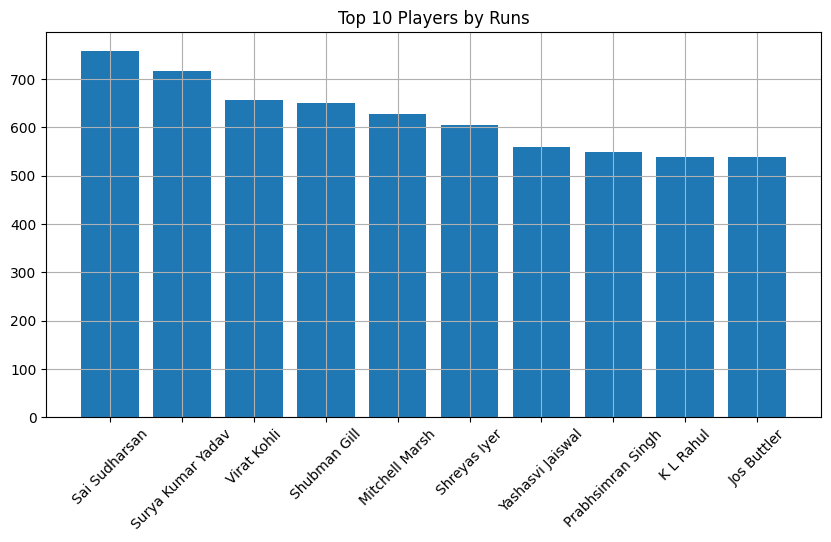

In [59]:
plt.figure(figsize=(10,5))
plt.bar(top_10["Player Name"], top_10["Runs"])
plt.xticks(rotation=45)
plt.title("Top 10 Players by Runs")
plt.grid(True)
plt.show()

## ⚡ Highest Strike Rate (Minimum 200 Runs)

To ensure fair comparison, we filter players who have scored at least 200 runs.

This avoids small-sample bias and ensures that strike rate comparisons are meaningful.

Players are then ranked based on strike rate to identify the most aggressive batters.


In [73]:
df_sr = df[df['Runs'] >= 200]

In [75]:
df_sr_sorted = df_sr.sort_values(by='SR', ascending=False)

In [77]:
top10_sr = df_sr_sorted.head(10)

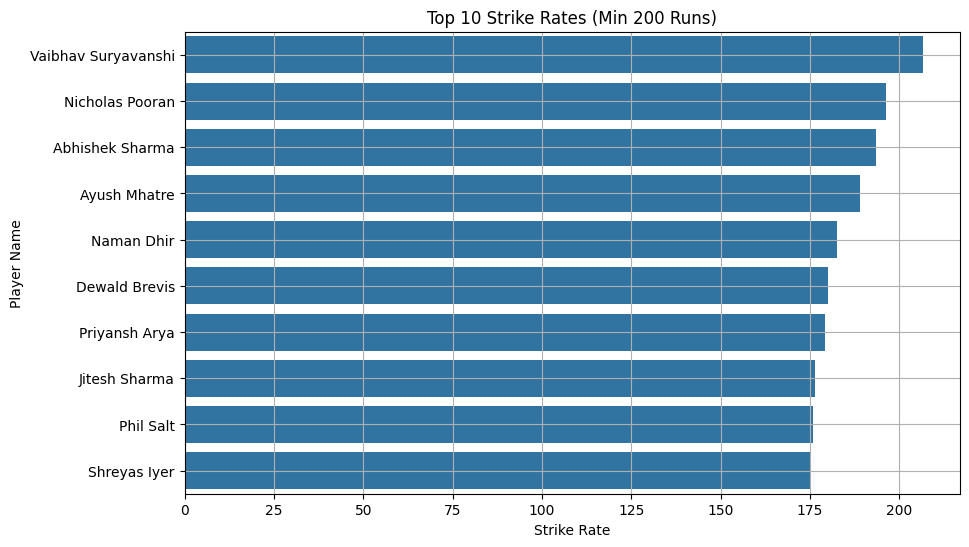

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x='SR', y='Player Name', data=top10_sr)
plt.title("Top 10 Strike Rates (Min 200 Runs)")
plt.xlabel("Strike Rate")
plt.ylabel("Player Name")
plt.grid(True)
plt.show()

## 🎯 Most Consistent Batters (Minimum 300 Runs)

Consistency is evaluated using batting average while filtering players with at least 300 runs.

A scatter plot of Strike Rate vs Average helps classify players into:
- Anchors (High Average, Moderate Strike Rate)
- Aggressors (High Strike Rate, Moderate Average)
- Balanced Performers (High in both metrics)


In [81]:
df_consistent = df[df['Runs'] >= 300]

In [84]:
df_consistent_sorted = df_consistent.sort_values(by='AVG', ascending=False)

In [83]:
top10_avg = df_consistent_sorted.head(10)

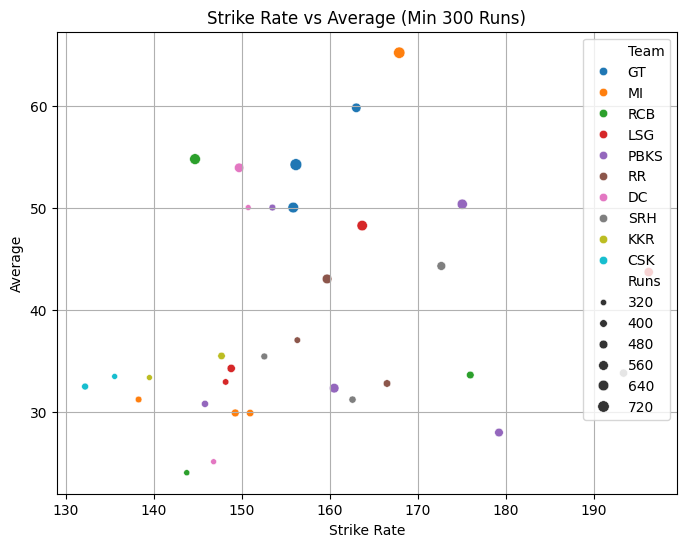

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_consistent, x='SR', y='AVG', size='Runs', hue='Team')
plt.title("Strike Rate vs Average (Min 300 Runs)")
plt.xlabel("Strike Rate")
plt.ylabel("Average")
plt.grid(True)
plt.show()

## 💣 Boundary Hitters Analysis

Boundary hitting ability significantly impacts match outcomes.  
We analyze:
- Top six hitters
- Boundary contribution percentage
- Dependency on 4s and 6s


In [87]:
df_six = df.sort_values(by='6s', ascending=False)

In [88]:
top10_six = df_six.head(10)

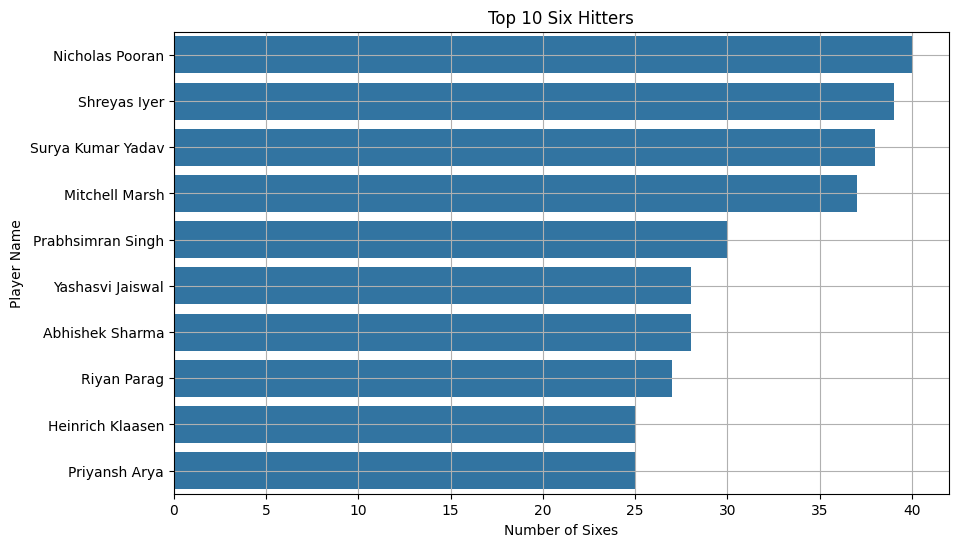

In [91]:
plt.figure(figsize=(10,6))
sns.barplot(x='6s', y='Player Name', data=top10_six)
plt.title("Top 10 Six Hitters")
plt.xlabel("Number of Sixes")
plt.ylabel("Player Name")
plt.grid(True)
plt.show()

## 🔥 Correlation Analysis

We compute a correlation matrix to understand relationships between batting metrics such as:
- Runs
- Balls Faced
- Strike Rate
- Boundaries
- Average

This helps identify performance patterns and scoring dependencies.


In [92]:
corr_matrix = df.corr(numeric_only=True)

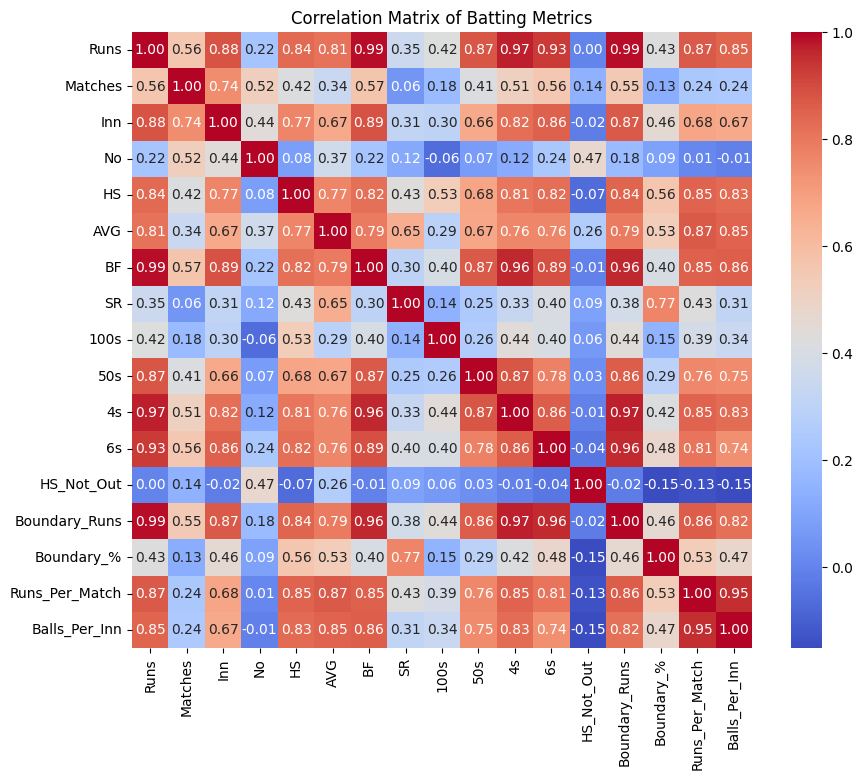

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Batting Metrics")
plt.show()

# 📌 Conclusion

This analysis reveals key batting patterns in IPL 2025:

- Top performers contribute a significant portion of total league runs.
- Strike rate alone is insufficient to judge performance without consistency.
- Boundary-heavy players tend to have higher strike rates but sometimes lower averages.
- Balanced batters provide both stability and acceleration.

This project demonstrates the use of data cleaning, feature engineering, and exploratory data analysis to derive actionable insights from sports data.
